In [1]:
#general 
import tweepy                 #to consume twitter api
import pandas as pd           #to handle data manupulation
import numpy as np            #for number computation   

#for ploting and manupunation
from IPython.display import display  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
#twitter app access key for user

#consumer
consumer_key = 'fMKjC8wbEoUbNVbGcWUf5rFEU'
consumer_secret = 'ihljrt7IUdMNvEXJt11nluYjxOQtvzRZtpCbhU1keLwY9ZaAuc'

#access
access_token = '775347217414492160-GddSYTKySTLF4OEct5L5ZyyCtdhGTx4'
access_token_secret = 'uBkeXbEFXqPLg1Ea9LUYxd7EK6L0aT9m9yc8rZbRlRg7K'


In [7]:
#we import our access key
from credentials import *  #this will allow us to use the variable

def twitter_setup():
    
    
    #authentication and access using key
    auth =tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    
    #return authentication with api:
    api =tweepy.API(auth)
    return api

In [10]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("10 recent tweets:\n")
for tweet in tweets[:10]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

10 recent tweets:

https://t.co/E3xvdUGZqa

Join me in Tampa, Florida next Tuesday, July 31st at 7:00pmE for a #MAGA Rally! Tickets: https://t.co/Q2PMyTACl8 https://t.co/URjvN8Owoe

The only things the Democrats do well is “Resist,” which is their campaign slogan, and “Obstruct.” Cryin’ Chuck Sch… https://t.co/GBFgVFHKgz

Democrats, who want Open Borders and care little about Crime, are incompetent, but they have the Fake News Media al… https://t.co/x2QxE3DYGu

Congressman David Kustoff has been a champion for the Trump Agenda - I greatly appreciate his support. David is str… https://t.co/b69nex9NfW

Private business investment has surged from 1.8 percent the year BEFORE I came into office to 9.4 percent this year… https://t.co/LSqCNJs3u8

The @USNavy’s first female Admiral, Alene Duerk once said: “It was a nice distinction to have, and to be recognized… https://t.co/PWflPU2xFK

We have accomplished an economic turnaround of HISTORIC proportions! https

In [12]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,https://t.co/E3xvdUGZqa
1,"Join me in Tampa, Florida next Tuesday, July 3..."
2,The only things the Democrats do well is “Resi...
3,"Democrats, who want Open Borders and care litt..."
4,Congressman David Kustoff has been a champion ...
5,Private business investment has surged from 1....
6,"The @USNavy’s first female Admiral, Alene Duer..."
7,We have accomplished an economic turnaround of...
8,I am thrilled to announce that in the second q...
9,.@Troy_Balderson of Ohio is running for Congre...


In [13]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [14]:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1023246073060634626
2018-07-28 16:37:29
Media Studio
28654
<bound method Status.retweet of Status(_api=<tweepy.api.API object at 0x04CED9D0>, _json={'created_at': 'Sat Jul 28 16:37:29 +0000 2018', 'id': 1023246073060634626, 'id_str': '1023246073060634626', 'text': 'https://t.co/E3xvdUGZqa', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1023245132466925569, 'id_str': '1023245132466925569', 'indices': [0, 23], 'media_url': 'http://pbs.twimg.com/amplify_video_thumb/1023245132466925569/img/_KkQ8GLfAaCWQKGN.jpg', 'media_url_https': 'https://pbs.twimg.com/amplify_video_thumb/1023245132466925569/img/_KkQ8GLfAaCWQKGN.jpg', 'url': 'https://t.co/E3xvdUGZqa', 'display_url': 'pic.twitter.com/E3xvdUGZqa', 'expanded_url': 'https://twitter.com/realDonaldTrump/status/1023246073060634626/video/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1200, 'h': 675, 'resize': 'fit'}, 'small': {'w':

In [15]:
#we add relevent data to daataframe
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [16]:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,https://t.co/E3xvdUGZqa,23,1023246073060634626,2018-07-28 16:37:29,Media Studio,28654,8701
1,"Join me in Tampa, Florida next Tuesday, July 3...",136,1023023685681250304,2018-07-28 01:53:48,Twitter for iPhone,39101,10557
2,The only things the Democrats do well is “Resi...,140,1023007120130760704,2018-07-28 00:47:58,Twitter for iPhone,84889,22394
3,"Democrats, who want Open Borders and care litt...",140,1022976410745495552,2018-07-27 22:45:56,Twitter for iPhone,89224,22119
4,Congressman David Kustoff has been a champion ...,140,1022936690267176971,2018-07-27 20:08:06,Twitter for iPhone,54630,13617
5,Private business investment has surged from 1....,140,1022925366669856769,2018-07-27 19:23:07,Twitter for iPhone,49246,13220
6,"The @USNavy’s first female Admiral, Alene Duer...",140,1022908672756801536,2018-07-27 18:16:46,Twitter for iPhone,45509,10604
7,We have accomplished an economic turnaround of...,92,1022879441767288834,2018-07-27 16:20:37,Twitter for iPhone,58127,15062
8,I am thrilled to announce that in the second q...,140,1022877332858650624,2018-07-27 16:12:14,Twitter for iPhone,79171,19575
9,.@Troy_Balderson of Ohio is running for Congre...,140,1022873937561243649,2018-07-27 15:58:45,Twitter for iPhone,40612,10610


In [19]:
#we extract menas of the length
mean = np.mean(data['len'])
print ("The length's average in tweets: {}".format(mean))


The length's average in tweets: 124.355


In [21]:
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
To Iranian President Rouhani: NEVER, EVER THREATEN THE UNITED STATES AGAIN OR YOU WILL SUFFER CONSEQUENCES THE LIKE… https://t.co/xUdD66vfBW
Number of likes: 331437
140 characters.

The tweet with more retweets is: 
To Iranian President Rouhani: NEVER, EVER THREATEN THE UNITED STATES AGAIN OR YOU WILL SUFFER CONSEQUENCES THE LIKE… https://t.co/xUdD66vfBW
Number of retweets: 107631
140 characters.



In [22]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

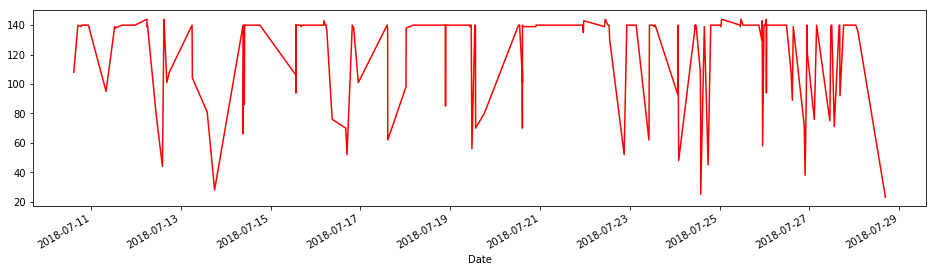

In [23]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

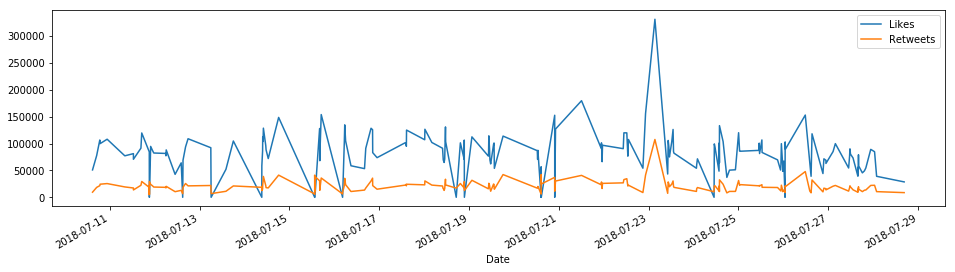

In [24]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [25]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Media Studio
* Twitter for iPhone
* Twitter for iPad


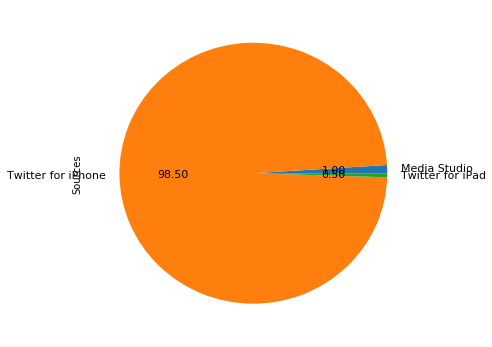

In [26]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [30]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    #utility function to clean the text in a tweet by removing linkes and apecial charactor using regex
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
def analize_sentiment(tweet):
    #utility function to classify the polarity of a tweet using textblob
    analysis = TextBlob(clean_tweet(tweet))
    
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
        
    

In [31]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,https://t.co/E3xvdUGZqa,23,1023246073060634626,2018-07-28 16:37:29,Media Studio,28654,8701,0
1,"Join me in Tampa, Florida next Tuesday, July 3...",136,1023023685681250304,2018-07-28 01:53:48,Twitter for iPhone,39101,10557,0
2,The only things the Democrats do well is “Resi...,140,1023007120130760704,2018-07-28 00:47:58,Twitter for iPhone,84889,22394,0
3,"Democrats, who want Open Borders and care litt...",140,1022976410745495552,2018-07-27 22:45:56,Twitter for iPhone,89224,22119,-1
4,Congressman David Kustoff has been a champion ...,140,1022936690267176971,2018-07-27 20:08:06,Twitter for iPhone,54630,13617,1
5,Private business investment has surged from 1....,140,1022925366669856769,2018-07-27 19:23:07,Twitter for iPhone,49246,13220,0
6,"The @USNavy’s first female Admiral, Alene Duer...",140,1022908672756801536,2018-07-27 18:16:46,Twitter for iPhone,45509,10604,1
7,We have accomplished an economic turnaround of...,92,1022879441767288834,2018-07-27 16:20:37,Twitter for iPhone,58127,15062,1
8,I am thrilled to announce that in the second q...,140,1022877332858650624,2018-07-27 16:12:14,Twitter for iPhone,79171,19575,1
9,.@Troy_Balderson of Ohio is running for Congre...,140,1022873937561243649,2018-07-27 15:58:45,Twitter for iPhone,40612,10610,1


In [32]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 49.0%
Percentage of neutral tweets: 33.0%
Percentage de negative tweets: 18.0%
